In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score

In [43]:
################
# NON-LINEAR PCA
# (Recommended by Parker during our presentation)
# STEPS: Run each cell individually to produce the PCA plot and get the accuracy score
# Non-linear pca doesn't produce great results (similarly to PCA)
################

In [24]:
#Load all datasets
meta = pd.read_csv("data/EyeGEx_meta_combined_inferior_retina_summary_deidentified_geo_ids.csv")
gct = pd.read_table("data/EyeGEx_retina_combined_genelevel_expectedcounts_byrid_nooutlier.tpm.matrix.gct", header=2, delim_whitespace=True)
tsv = pd.read_csv("data/EyeGEx_retina_combined_genelevel_expectedcounts_byrid_nooutliers.counts.matrix.tsv", sep='\t')
controls = pd.read_csv("data/Retina.3009_ssva_controls.txt",header=None)

In [26]:
#Testing out PCA with significant genes from the paper itself (Supplementary Table 1)
known_genes = ["B3GLCT",
              "BLOC1S1",
               "RP11-644F5.10",
               "CTA-228A9.3",
               "SH2B3",
              "MEPCE",
              "PMS2P1",
               "STAG3L5P-PVRIG2P-PILRB",
              "PILRB",
              "TMEM199",
              "POLDIP2",
              "CFI",
              "PLA2G12A",
              "ANAPC11",
              "SKIV2L",
              "HERPUD1",
              "TOMM70",
              "KCNT2",
              "TMEM229B",
              "PLTP"]

In [27]:
#Filtering out all of the important genes
gct_known = gct[gct["Description"].isin(known_genes)]

,NAME,Description,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
47,ENSG00000004142,POLDIP2,103.280279,83.070597,88.845453,99.128805,95.898465,96.232539,73.518065,83.533680,...,92.651663,100.723107,61.485052,104.961782,63.991202,88.624997,75.600194,106.447074,96.606220,70.562150
688,ENSG00000051108,HERPUD1,36.586128,40.005485,35.960644,44.733110,37.743634,38.003001,41.474960,56.154710,...,55.384670,38.396009,39.193665,33.554607,43.215667,41.714618,33.386766,31.893300,46.584608,51.927413
1420,ENSG00000078319,PMS2P1,13.700222,13.123049,11.006051,13.756304,9.888216,10.677443,10.008658,12.993344,...,12.358665,12.665686,12.315425,11.505827,10.654442,14.205235,10.440826,13.308237,13.144152,9.534280
2415,ENSG00000100979,PLTP,9.588660,9.772740,10.551256,14.947281,6.951761,24.536983,10.754922,23.483005,...,8.983630,32.524046,4.915369,10.715226,6.385139,5.106841,11.063007,13.100050,17.060452,4.476882
3867,ENSG00000111252,SH2B3,9.330512,8.907263,9.774117,7.937784,6.629142,4.446945,5.163268,8.347457,...,7.685642,5.963371,5.947966,6.060302,11.311955,9.200402,6.007552,5.909307,9.330998,4.942609
5188,ENSG00000121716,PILRB,66.340216,31.269002,34.316791,18.571391,44.019546,72.099604,11.436045,34.657709,...,19.574989,35.051124,10.046083,103.075232,7.212442,16.692411,33.384644,32.219100,19.405608,23.733006
5423,ENSG00000123739,PLA2G12A,38.017116,48.945794,46.740771,62.011347,53.762845,30.002991,53.272204,63.916175,...,68.026845,35.725811,70.055371,35.230542,66.126549,64.109412,45.759602,37.648972,56.373710,47.258464
7083,ENSG00000135441,BLOC1S1,125.615260,112.830359,122.334412,94.686390,93.985000,121.003281,73.072410,76.925406,...,80.824083,132.843601,56.815263,131.223787,65.948391,98.713956,96.873546,121.133769,97.479731,88.705670
8137,ENSG00000141552,ANAPC11,15.910197,13.859964,11.603499,10.789073,8.649785,18.858635,6.187469,5.791766,...,9.529800,11.492530,3.466441,18.891613,4.338884,5.958622,7.764199,16.963293,11.539448,14.036081
8891,ENSG00000146834,MEPCE,21.042795,27.730008,20.494426,13.981117,18.381452,31.471683,12.221098,14.315865,...,18.766491,19.815133,10.419035,27.864286,9.944251,16.911707,22.729766,21.412837,17.691148,26.817851


In [28]:
#removing metadata and converting into numpy array for implementation
data = gct_known
data = data.T
data.columns=data.iloc[1]
data = data.drop(['NAME','Description'], axis=0)
data = data.reset_index()
data = data.rename(columns = {'index': 'r_id'})

Description,r_id,POLDIP2,HERPUD1,PMS2P1,PLTP,SH2B3,PILRB,PLA2G12A,BLOC1S1,ANAPC11,...,TOMM70,KCNT2,B3GLCT,TMEM229B,SKIV2L,CFI,TMEM199,RP11-644F5.10,CTA-228A9.3,STAG3L5P-PVRIG2P-PILRB
0,100_2,103.280279,36.586128,13.700222,9.58866,9.330512,66.340216,38.017116,125.61526,15.910197,...,75.38143,0.381296,14.624959,19.492791,23.918045,52.397389,22.071675,34.547631,5.510115,70.358072
1,101_3,83.070597,40.005485,13.123049,9.77274,8.907263,31.269002,48.945794,112.830359,13.859964,...,94.477201,0.266479,27.866222,10.013343,23.88377,79.891333,22.882173,29.979616,5.446274,58.313814
2,102_2,88.845453,35.960644,11.006051,10.551256,9.774117,34.316791,46.740771,122.334412,11.603499,...,84.181275,0.431561,21.054677,11.591821,26.291113,93.009795,20.476973,40.231388,6.94925,77.324778
3,103_3,99.128805,44.73311,13.756304,14.947281,7.937784,18.571391,62.011347,94.68639,10.789073,...,111.946197,0.429866,30.376396,16.325662,18.342147,88.914144,21.873745,33.616004,5.916198,32.187625
4,104_2,95.898465,37.743634,9.888216,6.951761,6.629142,44.019546,53.762845,93.985,8.649785,...,110.235078,0.439049,19.855466,17.312631,14.797374,49.674907,20.073209,36.981464,11.964328,38.554473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,95_4,88.624997,41.714618,14.205235,5.106841,9.200402,16.692411,64.109412,98.713956,5.958622,...,138.612192,0.939946,27.60781,8.255832,16.056128,75.012441,30.174134,33.563511,7.5031,60.22075
449,96_3,75.600194,33.386766,10.440826,11.063007,6.007552,33.384644,45.759602,96.873546,7.764199,...,71.618807,0.565616,23.684118,6.342412,15.721227,104.00552,18.31605,23.94159,12.010382,56.69983
450,97_2,106.447074,31.8933,13.308237,13.10005,5.909307,32.2191,37.648972,121.133769,16.963293,...,78.180026,0.407682,16.482278,13.208587,22.157677,82.765215,21.803041,35.799954,6.867719,47.784968
451,98_3,96.60622,46.584608,13.144152,17.060452,9.330998,19.405608,56.37371,97.479731,11.539448,...,99.982905,0.483186,21.652285,11.444052,17.989548,101.248669,21.196691,29.000809,5.876219,25.293248


In [29]:
#get mgs levels for each sample for the filtered genes
#data_df = pd.DataFrame(data)
ids = list(gct.columns)
ids.remove('NAME')
ids.remove('Description')
data=pd.merge(data, meta[["r_id","mgs_level"]], how="left", on="r_id")
mgs = data["mgs_level"]

In [31]:
#Getting the features (genes) and the output values (mgs level)
X_feat = data.iloc[:,1:-1].values
y_target = data.iloc[:, -1].values

In [32]:
#Splitting the data into train and test sets using scipy train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X_feat, y_target, test_size = 0.2, random_state=0)

In [33]:
#Mean-centering the train and test data
stndS = StandardScaler()
XTrain = stndS.fit_transform(XTrain)
XTest = stndS.transform(XTest)

In [34]:
#Running KernelPCA using the 'rbf' kernel
kernel_pca = KernelPCA(n_components=2, kernel= "rbf")

XTrain = kernel_pca.fit_transform(XTrain)

XTest = kernel_pca.transform(XTest)

In [35]:
#Creating a logistic regression classifier and fitting it to the training data

classifier = LogisticRegression(random_state=0)
classifier.fit(XTrain,YTrain)

LogisticRegression(random_state=0)

In [36]:
#Returning the predicted classes on the test data
Yprd = classifier.predict(XTest)

In [37]:
#Printing the confusion matrix
confusion = confusion_matrix(YTest, Yprd)
print(confusion)

[[ 0 16  4  0]
 [ 0 29  1  0]
 [ 0 22  2  0]
 [ 0 14  3  0]]


In [38]:
#Getting the accuracy
accuracy_score(YTest, Yprd)

0.34065934065934067

In [39]:
#Variables for graphing
Xset,Yset = XTrain,YTrain

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

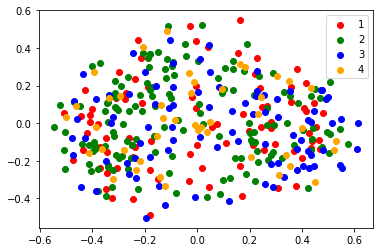

In [42]:
#Plotting the graph using 

for i,j in enumerate(np.unique(Yset)):
    plt.scatter(Xset[Yset == j, 0], Xset[Yset == j, 1],
               c = ListedColormap(('red','green','blue','orange'))(i), label=j)
    
plt.legend()
plt.show()